In [24]:
import math
import numpy

A = [[4, -2, 2], [-2, 2, -4], [2, -4, 11]]

print("Eredeti mátrix")
for row in A:
    print(row)

print()
n = len(A)
L = [[0.0] * n for _ in range(n)]

def Cholesky_felbontas(n, A, L):
    for j in range(n): 
        sum_diag = sum(L[j][k] ** 2 for k in range(j))
        L[j][j] = math.sqrt(A[j][j] - sum_diag)

        for i in range(j + 1, n):
            sum_off_diag = sum(L[i][k] * L[j][k] for k in range(j))
            L[i][j] = (A[i][j] - sum_off_diag) / L[j][j]

    return L
            
            
L = Cholesky_felbontas(n, A, L)

print("Cholesky felbontás után")
for row in L:
    print(row)

print()
print("Szorzás után:")
print(L * numpy.transpose(L))

Eredeti mátrix
[4, -2, 2]
[-2, 2, -4]
[2, -4, 11]

Cholesky felbontás után
[2.0, 0.0, 0.0]
[-1.0, 1.0, 0.0]
[1.0, -3.0, 1.0]

Szorzás után:
[[ 4. -0.  0.]
 [-0.  1. -0.]
 [ 0. -0.  1.]]


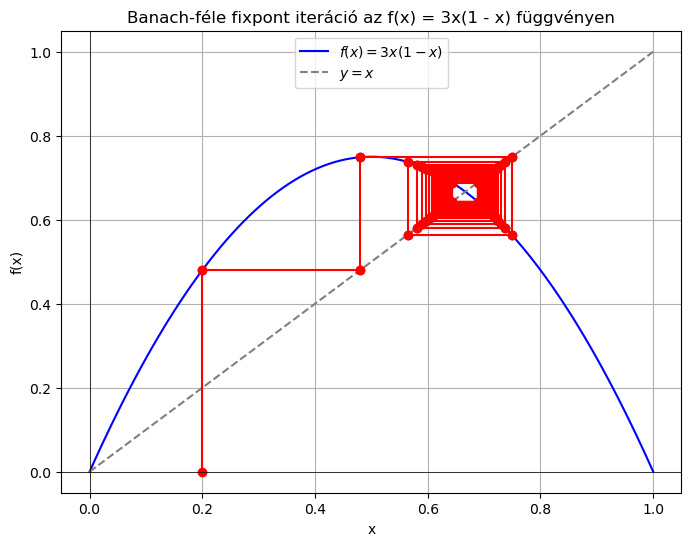

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def banach_fixed_point(f, x0, max_iter=100):

    x = x0
    iterates = [(x, 0)]
    for i in range(max_iter):
        y_new = f(x)
        iterates.append((x, y_new))
        iterates.append((y_new, y_new))
        x = y_new
    return iterates

def f(x):
    return 3 * x * (1 - x)

x0 = 0.2
iterates = banach_fixed_point(f, x0)

x_vals = np.linspace(0, 1, 100)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label=r'$f(x) = 3x(1 - x)$', color='blue')
plt.plot(x_vals, x_vals, label=r'$y = x$', linestyle='dashed', color='gray')

for i in range(len(iterates) - 1):
    x1, y1 = iterates[i]
    x2, y2 = iterates[i + 1]
    plt.plot([x1, x2], [y1, y2], 'ro-')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Banach-féle fixpont iteráció az f(x) = 3x(1 - x) függvényen')
plt.legend()
plt.grid()
plt.show()
